In [1]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
data = load_digits().data
target = load_digits().target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [5]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [12]:
plot(X_train[0])
img_show

NameError: name 'plot' is not defined

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

In [8]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.107168
Test set score: 0.077778


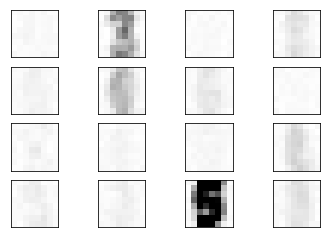

In [9]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()